# Thrust Bench 

## Requirements
    
   Install RCbenchmark software from [here](https://www.tytorobotics.com/blogs/manuals-and-datasheets/rcbenchmark-software-overview)
    

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

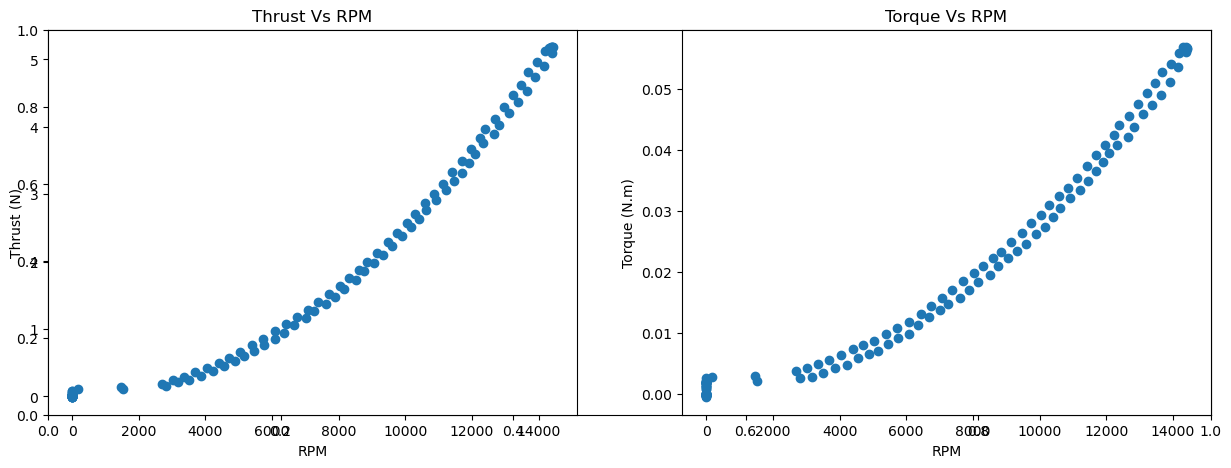

In [3]:
# Plot Data

# data_dir = 'grey_prop_data'
data_dir = 'black_prop_6in'
# data_dir = 'triblade_prop'

csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')] 
csv = csv_files[0]
columns = ["Thrust (kgf)","Motor Electrical Speed (RPM)", "Torque (N·m)"]
data = pd.read_csv(os.path.join(data_dir,csv) ,usecols=columns)
# data.rename(columns={"Thrust (kgf)": "Thrust", "Motor Electrical Speed (RPM)": "RPM", "Torque (N·m)": 'Torque'}, inplace=True)
thrust = 9.81 * (data['Thrust (kgf)'].values)
rpm = data['Motor Electrical Speed (RPM)'].values
torque = data['Torque (N·m)'].values

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(rpm, thrust)
plt.title('Thrust Vs RPM')
plt.xlabel('RPM')
plt.ylabel('Thrust (N)')
plt.subplot(1, 2, 2)
plt.scatter(rpm, torque)
plt.title('Torque Vs RPM')
plt.xlabel('RPM')
plt.ylabel('Torque (N.m)')
plt.show()

In [4]:
#Quadratic funtion to Fit the data
def quad_func(w,kf):
    return kf* w**2 



fitted_Kfs= []
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
 
x_y = {}

for i,csv in enumerate(csv_files):
    
    #Get Voltage and RPM
    columns = ["Thrust (kgf)","Motor Electrical Speed (RPM)", "Torque (N·m)"]
    data = pd.read_csv(os.path.join(data_dir,csv) ,usecols=columns)
    
    #Rename Columns
    data.rename(columns={"Thrust (kgf)": "Thrust", "Motor Electrical Speed (RPM)": "RPM","Torque (N·m)":"Torque"}, inplace=True)
    data = data[data['RPM'] > 2000]

    # print(data.head())
    thrust = abs(data['Thrust'].values) * 9.81
    torque = data['Torque'].values
    rpm = data['RPM'].values

    Kfs, _ = curve_fit(quad_func,rpm,thrust)
    Kms, _ = curve_fit(quad_func,rpm,torque)


    fitted_Kfs.append(Kfs)

    thrust_fit = quad_func(rpm,*Kfs)
    torque_fit = quad_func(rpm,*Kfs)

    
    
    x_y [csv.split('.')[0]] = [rpm, thrust_fit, torque_fit, Kfs, Kms]
    

list_key = list(x_y.keys())
print(x_y.keys())
list_key.sort()

dict_keys(['RampTest_2023-12-06_212307', 'RampTest_2023-12-06_212433', 'RampTest_2024-01-31_172710', 'RampTest_2024-02-01_172407', 'StepsTestV2_2023-12-06_212726', 'StepsTestV2_2023-12-06_212902'])


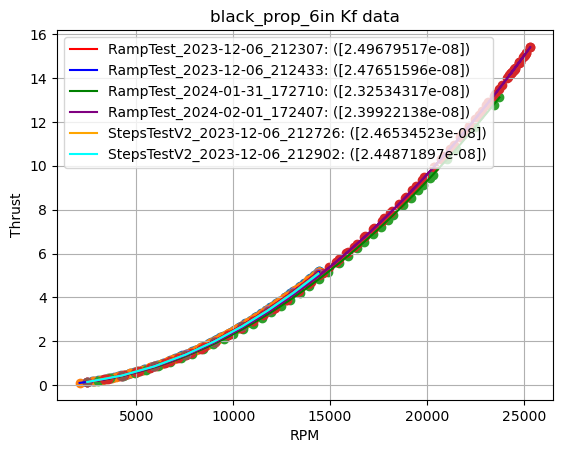

In [5]:
for i,key in enumerate(list_key):
    x_sorted= x_y[key]
    plt.plot(x_sorted[0],x_sorted[1], label=f"{key}: ({x_sorted[3]})", color=colors[i % len(colors)])
    plt.scatter(x_sorted[0],x_sorted[1])

plt.xlabel("RPM")
plt.ylabel("Thrust")
plt.title(data_dir+ " Kf data")
plt.legend()

plt.grid(True)

#plt.savefig("Kf_data.png",dpi=600)

plt.show()

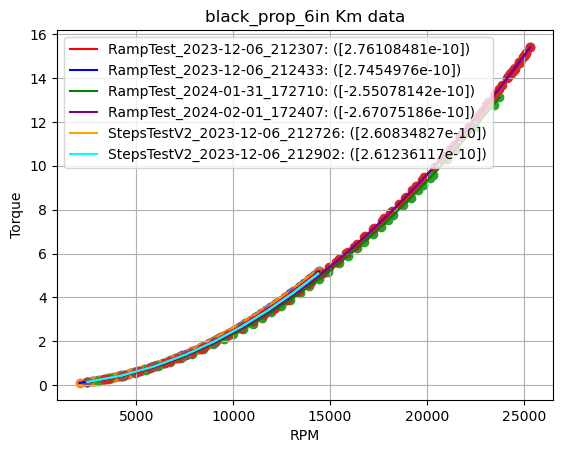

In [6]:
for i,key in enumerate(list_key):
    x_sorted= x_y[key]
    plt.plot(x_sorted[0],x_sorted[2], label=f"{key}: ({x_sorted[4]})", color=colors[i % len(colors)])
    plt.scatter(x_sorted[0],x_sorted[1])  
plt.xlabel("RPM")
plt.ylabel("Torque")
plt.title(data_dir+ " Km data")

plt.legend()

plt.grid(True)

#plt.savefig("Kf_data.png",dpi=600)

plt.show()